ゼロつく第4章

In [3]:
import sys, os
import numpy as np
from sample.dataset.mnist import load_mnist

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

print(x_train.shape)
print(t_train.shape)

(60000, 784)
(60000,)


In [3]:
# ミニバッチ学習

train_size = x_train.shape[0]
batch_size = 10
batch_mask = np.random.choice(train_size, batch_size)
x_batch = x_train[batch_mask]
t_batch = t_train[batch_mask]
print(x_batch.shape)

(10, 784)


In [4]:
np.random.choice(60000, 10)

array([40924, 18480, 27450, 14192, 26833, 37674, 26668, 31988, 17942,
       45004])

In [4]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    if t.size == y.size:
        t = t.argmax(axis=1)
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

In [5]:
def numerical_diff(f, x):
    h = 1e-4
    return (f(x+h) - f(x-h)) / (2*h)

In [6]:
def function_1(x):
    return 0.01*x**2 + 0.1*x

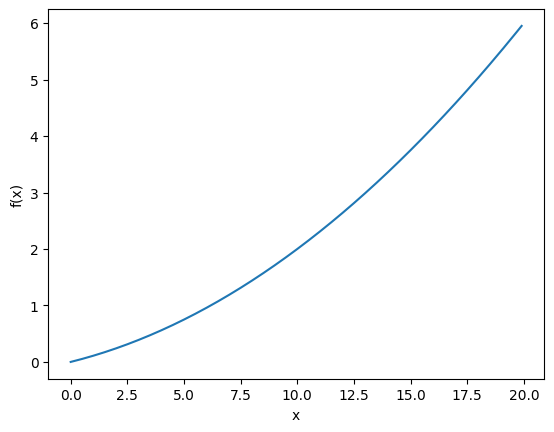

In [14]:
import matplotlib.pyplot as plt

x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")
plt.plot(x, y)
plt.show()

In [9]:
print(numerical_diff(function_1, 5))
print(numerical_diff(function_1, 10))

0.1999999999990898
0.2999999999986347


In [7]:
def function_2(x):
    return x[0]**2 + x[1]**2

In [27]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x)

    # print(type(x))
    # print(x.shape)
    # print(f"x: {x}")

    # for idx in range(x.size):
    for idx in range(x.shape[0]):
        # print(idx)
        tmp_val = x[idx]
        x[idx] = tmp_val + h
        fxh1 = f(x)

        x[idx] = tmp_val - h
        fxh2 = f(x)

        grad[idx] = (fxh1 - fxh2) / (2*h)
        x[idx] = tmp_val
    
    return grad

In [12]:
print(numerical_gradient(function_2, np.array([3.0, 4.0])))
print(numerical_gradient(function_2, np.array([0.0, 2.0])))
print(numerical_gradient(function_2, np.array([3.0, 0.0])))

[6. 8.]
[0. 4.]
[6. 0.]


In [8]:
# 2層のニューラルネット

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [9]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a - c)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    return y

def sigmoid_grad(x):
    return (1.0 - sigmoid(x)) * sigmoid(x)

In [10]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

    def predict(self, x):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']

        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)

        return y
    
    def loss(self, x, t):
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)

        accuracy = np.sum(y==t) / float(x.shape[0])
        return accuracy
    
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
    
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        dz1 = np.dot(dy, W2.T)
        da1 = sigmoid_grad(a1) * dz1
        grads['W1'] = np.dot(x.T, da1)
        grads['b1'] = np.sum(da1, axis=0)

        return grads

In [16]:
net = TwoLayerNet(input_size=784, hidden_size=100, output_size=10)
print(net.params['W1'].shape)
print(net.params['b1'].shape)
print(net.params['W2'].shape)
print(net.params['b2'].shape)

(784, 100)
(100,)
(100, 10)
(10,)


In [23]:
from tqdm import tqdm

j = 0
for i in tqdm(range(10000)):
    j += i


100%|██████████| 10000/10000 [00:00<00:00, 2846490.67it/s]


In [19]:
# プロット
def plot_loss_acc(y):
    x = np.arange(len(y))
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set_xlabel('iteration')
    # ax.set_ylabel('y')
    plt.show()

In [17]:
# テストデータ評価をしない

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

100%|██████████| 10000/10000 [00:21<00:00, 455.95it/s]


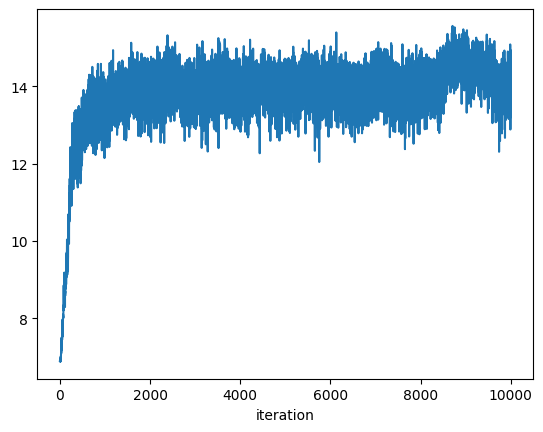

In [20]:
plot_loss_acc(train_loss_list)

In [24]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

train_loss_list = []
train_acc_list = []
test_acc_list = []

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

iter_per_epoch = max(train_size / batch_size, 1)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

for i in tqdm(range(iters_num)):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    grad = network.gradient(x_batch, t_batch)
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train_acc, test_acc | " + str(train_acc) + "," + str(test_acc))

train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


 55%|█████▍    | 5469/10000 [00:14<00:14, 308.51it/s]















train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


train_acc, test_acc | 0.11236666666666667,0.1135


 91%|█████████ | 9111/10000 [00:25<00:02, 323.65it/s]











train_acc, test_acc | 0.11236666666666667,0.1135








100%|██████████| 10000/10000 [00:27<00:00, 362.16it/s]
